# 1.1 Golden Section Search for the Mode of a Function

Notes:
- read manual
- graph sizes (think it's okay tho)
- 4 ?
- 5 again I think this is about differentiability (whether it is smooth near the mode or not) think about different kinds of modular functions, maybe not continuous too. what about functions like 1/x ?

### Question 1

Let $f$ be unimodal on $[a, b]$ with a maximum at some point undetermined point in $[a, b]$. Choose the points $x, y$ with $a < x < y < b$, such that

$$ (y − a)/(b − a) = (\sqrt{5} − 1)/2  \qquad (1) $$

and

$$ b - x = y - a  \qquad (2) $$

That is, the interval is divided from each end in *golden section*.

(i) Suppose that $f(x) \geq f(y)$, ie. we deduce that the mode lies in the subinterval $[a,y] $. 

Claim: The interval $[a,y] $ is divided in golden section from $y$ by the point $x$ (at which we already have a function evaluation).

Proof:


$$ 
\begin{align}
\frac{x-a}{y-a} & = \frac{(b-a) - (b - x)}{y-a} \\
& =  \frac{b-a}{y-a} - 1 \qquad (\text{using } b - x = y - a) \\
& = \frac{2}{\sqrt{5}-1} - 1\\
& = \frac{\sqrt{5} - 1}{2}
\end{align}
$$


(ii) Simiarly, if  $f(y) \geq f(x)$, we deduce the mode lies in $[x,b]$, which is divided in golden section from $x$ by $y$, ie.

$$ 
\begin{align}
\frac{b-y}{b-x} & = \frac{\sqrt{5} - 1}{2}
\end{align}
$$



### Programming Task

The program to implement the golden search for unimodal functions with a maximum is shown at the end of the notebook, labelled


`(i) golden_search(f,a,b,tol=1e-5)`

This program requires the input of the function `f`, intervals boundaries `a` and `b`, and the required tolerance `tol`, where the iteraction will be terminated once the mode is guaranteed to lie in an interval of width less than `tol`. (The default value is $1 \times 10^{-5}$).

The program outputs 
- the value of the mode 
- the accuracy
- the number of interations performed. 

Note that if the function is unimodal with a minimum on $[a,b]$, run the program on $-f$.

(i) Note, as illustrated here, if $f(x) = f(y)$ at one or more steps (thus the mode lies between $x$ and $y$) the search automatically takes the (higher) $[y,b]$ subinterval as the new interval. 

For example, taking the constant function $f(x) = 1$ in the range $x \in [0,1]$, our program iteratively chooses the higher interval



In [77]:
def f(x):
    return 1
golden_search(f,0,1)

Accuracy of 1e-05 reached after 24 iterations
Mode: 1, located at 0.9999951775634202


1

Therefore concluding the mode is within `tol` of $x=1$. However, we are only applying our program to unimodal functions, so we do not have to worry about this.

(ii) It is preferable to use equation (2) to locate the point for the second function evaluation. There are less operations than if we used equation (1), (specifically no multiplication, as this is more costly than addition) therefore we reduce the computational cost with a high number of iterations. 

(iii) As illustrated below, if the mode were at an endpoint of the original interval $[a,b]$, eg. at $a$, the program functions as normal, choosing a succession of subintervals $[a,b_i]$ until we are within the required tolerance. The end result will be within `tol` of the true mode.

Taking $f(x) = 4 - x$ in the range $x \in [0,4]$, which has mode at $x=0$,

In [78]:
def f(x):
    return 4 - x
golden_search(f,0,4,tol=1e-6)

Accuracy of 1e-06 reached after 32 iterations
Mode: 3.999999589630452, located at 4.1036954812057047e-07


3.9999995896304519

### Question 2

To check our program, we test for the position of the mode in $[0,1]$ of the function $  f(x) = 1 + x + x^2 - 4x^4 $.

I will plot the graph in the range $ x \in [0,1]$. 

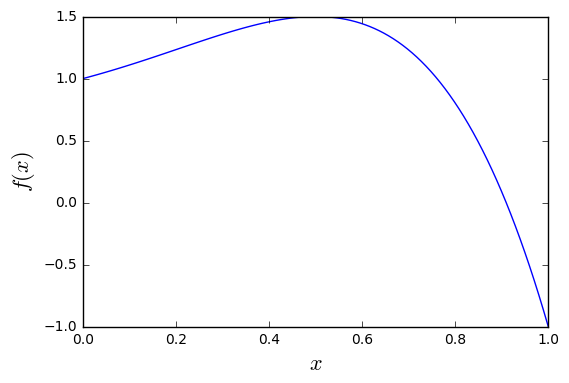

In [79]:
def f(x):
    return 1 + x + x**2 - 4*x**4
x = np.linspace(0,1,100)
plt.plot(x,f(x))
plt.xlabel('$x$', fontsize = 16)
plt.ylabel('$f(x)$', fontsize = 16)

Figure 2.1: Plot of $  f(x) = 1 + x + x^2 - 4x^4 $ for $ x \in [0,1]$

From our graph we can see the mode lies at approximately $x = 0.5$. Now, implementing our `golden_search` for this function,

In [80]:
golden_search(f,0,1)

Accuracy of 1e-05 reached after 24 iterations
Mode: 1.5, located at 0.5


1.5

Thus we can that after 24 iterations, our program has located the mode at $x=0.5$, to within an interval of width $1 \times 10^{-5} $ 

### Question 3

Consider the more intuitively obvious `tenary_search` algorithm that splits the interval into 'equal thirds', ie. $x = \frac{1}{3}(b-a)$, $y = \frac{2}{3}(b-a)$.


The most time consuming part of any algorithm in a real-life problem will be the (perhaps costly) explicit evaluation of the function in question, at the points $x$ and $y$. Some examples of real life applications can be seen in [1], [2].



The advantage of the golden section search is that with every iterative step (except the first), either $f(x)$ or $f(y)$ would have been evaluated previously, and this result can be reused, avoiding the (perhaps costly) evaluation of the function at this point.

Suppose evaluating the function at a point takes $f_k$ numerical operations and further suppose are program terminates after $n$ iterations. Assuming the evalutation of $x$ and $y$ are inexpensive compared to the evaluations of the function, we see that the ternary search algorithm takes approxamitely $n f_k$ more numerical operations than  (ie. double that of) the golden search algorithm. 

As the number of operations $f_k$ grows, and as the number of iterations increase, this difference becomes more pronounced.

### Question 4

The properties of $f$ that determine the numerical accuracy attainable are to do with smoothness. Smooth functions have a first derivative close to zero (ie. are flat) near the minimum, so we cannot expect to great an accuracy in calculating the mode. 

As ilustrated by the graphs below, if the mode is located at an endpoint, or at a point where the function is not smooth eg. $ f(x) = -|x - 1| + 1 $ with $x \in [0,2]$, we can expect to calculate the mode at $x=1$ with greater accuracy than we would with $g(x) = -(x-1)^2 + 1$  

In [16]:
x = np.linspace(0,2,100)
def f(x):
    return - np.abs(x - 1) + 1
def g(x):
    return -(x-1)**2 + 1

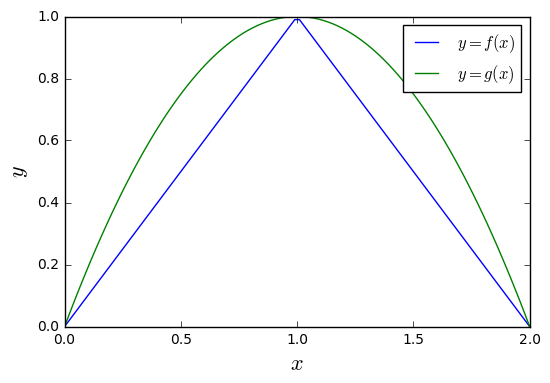

In [25]:
#plt.figure(1)
plt.plot(x, f(x), label='$y = f(x)$')
plt.plot(x, g(x),label='$y = g(x)$')
plt.legend()
plt.xlabel('$x$', fontsize = 16)
plt.ylabel('$y$', fontsize = 16)

Consider also the case where the mode of the function lies outside the maximum range that the computer lanugage can compute. 

In [33]:
sys.maxsize

9223372036854775807

which is exactly $2^{63} - 1$

In [ ]:
sys.maxsize**sys.maxsize

### Question 5

If the mode is located at $ x = x_{0} $, then performing a Taylor expansion about $ x_{0} $, gives

$$  f(x) = f(x_{0}) +(x - x_0)f'(x_0) +  \frac{(x-x_{0})^{2}}{2!} f''(x_{0}) + o((x-x_0)^2)$$

Suppose at this point, the mode is a local maximum (or minimum), so $f'(x_0) = 0$. Then, assuming $o((x-x_0)^2)$ terms are small,

$$ \left|   f(x) - f(x_{0})  \right| \approx  \frac{(x-x_{0})^{2}}{2!}   \left| f''(x_{0}) \right|  $$

ie. the size of the error in $f(x_0)$ is approximately proprotional to the size of the squared error in $x_0$. 



However it could be the case that $x_0$ is not a local maximum (or minimum) eg. the mode was found at either endpoint $a$ or $b$. Again ignoring $o((x-x_0)^2)$ terms, 

$$ (   f(x) - f(x_{0}) )  \approx  (x-x_0) \left( f'(x_0) +  \frac{(x-x_{0})}{2!}f''(x_0) \right)   $$

ie. the size of the error in $f(x_0)$ is approximately proprotional to the size of the error in $x_0$.

## Optimization of turntable and tone-arm design


### Programming Task

Consider the triangle $PQS$ as $x$ decreases from $R$ to $r$. 

Note $S\hat{P}Q = 90 - \phi$, and by application of the cosine rule we have 

$$
\begin{align}
d^{2} & = l^{2} + x^{2} - 2 l x \cos(\pi/2 - \phi)  \\
\end{align}
$$


which can be rearranged to give $\phi$ as a function of $x$ and $d$:

$$ \phi(x,d)  = \arcsin \left( \frac{l^{2} + x^{2} - d^{2}}{2lx} \right)  \qquad (5.1)$$

This function is found at the end of the notebook, labelled 

`(i) phi(d,min_search = False ) `

To chose the value of $d$ and $\theta$ to minimize the maximum absolute value of $(\phi - \theta)$, we consider

$$ \Delta \phi = \max \phi(x) - \min \phi(x) \qquad (5.2)$$  

for a fixed value of $d$, where $ \max \phi(x) $ and $ \min \phi(x) $ are found by applying the golden section search program to (5.1) (for a fixed value of $d$). Note we choose the interval for $x$ to be $[r,R]$. This function is found at the end of the notebook, labelled

`(ii) delta_phi(d) `

Then we use the Golden Section Search again to find the minimum of $\left| \Delta \phi \right|$ as a function of $d$, where we have chosen the interval for $d$ to be $[17.5,30.5]$, as discussed in Question 6(i).

In [103]:
golden_search(delta_phi,17.5,30.5)

Accuracy of 1e-05 reached after 30 iterations
Mode: -0.03431729657792165, located at 21.229577210264125


-0.034317296577921652

We find that $d \approx 21.229577$ minimizes $\Delta \phi$. 

With this value of $d$, we retreive maximum and minimum values of $\phi(x)$ for $x \in [r,R]$

In [111]:
a = golden_search(phi(21.22957721,min_search=False),r,R)
b = golden_search(phi(21.22957721,min_search=True),r,R)

Accuracy of 1e-05 reached after 29 iterations
Mode: 0.5195515432384586, located at 15.99999586866894
Accuracy of 1e-05 reached after 29 iterations
Mode: -0.4852342466673103, located at 11.193973256972747


So we set $\theta$ to be the average of these values, ie.

In [113]:
theta = (a - b)/2
theta

0.50239289495288442

Thus givining the optimal value of the toe in angle.

### Question 6

(i) $x$ begins with initial value $R = 16$, and when the record ends, has value $r=6.5$, so we choose the range for the inner iteration to be $[6.5,16]$.

When $x = r$, applying the triangle inequality to $PQS$ (twice) gives

$$ d + 6.5 \geq 24, \qquad \qquad  6.5 + 24 \geq d $$

Thus we choose the range for the outer iteration to be $[17.5,30.5]$.



(ii) For ilustration purposes, and to check that our functions are indeed unimodal, we plot them

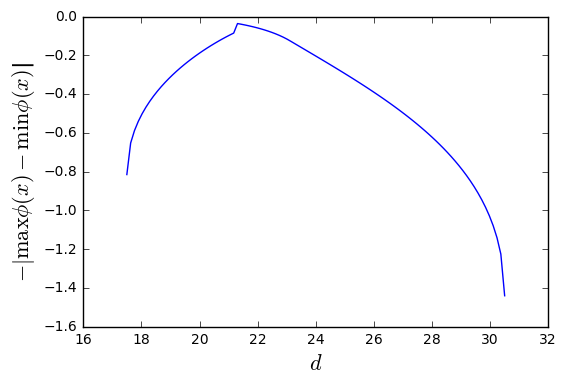

In [97]:
dval = np.linspace(17.5,30.5,100)
fd = list(map(lambda x: delta_phi(x) , dval))

plt.plot(dval,fd)
plt.xlabel('$d$', fontsize = 16)
plt.ylabel('$- |\max \phi(x) - \min \phi(x)$|', fontsize = 16)

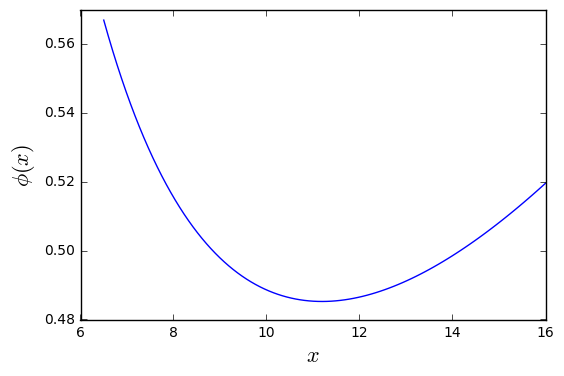

In [98]:
phi_opt = phi(d = d_0)
x = np.linspace(r,R,100)
plt.plot(x,phi_opt(x))
plt.xlabel('$x$', fontsize = 16)
plt.ylabel('$\phi(x)$', fontsize = 16)

In [99]:
golden_search(phi_opt,6.5,16)

Accuracy of 1e-05 reached after 29 iterations
Mode: 0.5669192904247764, located at 6.50000413133106


0.5669192904247764

(iii) Running our functions to find the value of $d$ to one decimal place shows we perform 11 outer iterations

In [68]:
golden_search(delta_phi,17.5,30.5,tol=0.1)

Accuracy of 0.1 reached after 11 iterations
Mode:


21.260686385694086

For each one of these outer iterations, we run several inner iterations to calculate $\max \phi(x)$ - $\min \phi(x)$ for the fixed value of $d$. Specifically, the number of iterations we run to find $\max \phi(x)$ for $d=20$ with an accuracy of `1e-5` is 29

In [74]:
golden_search(phi(20,min_search=True),6.5,16)

Accuracy of 1e-05 reached after 29 iterations
Mode:


13.266498617053536

## Programs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
%matplotlib inline

### The Golden Search Method


`(i) golden_search(f,a,b,tol=1e-5)`

In [100]:
def golden_search(f,a,b,tol=1e-5, suppress = False):
    ''' The mode lies between x and y, 
    iterate until we have calculated the mode to required tolerance 
    N records the number of iterations performed.
    If searching for a minimum, this functions returns the negative of the mode'''

    phi = (np.sqrt(5) - 1)/2

    y = a + phi * (b - a)
    x = b - phi * (b - a)
    
    top = f(y)
    bottom = f(x)

    N = 0
    while b - a > tol:
        N = N + 1
        #give new values of the endpoints a and b
        
        if bottom > top:
            b = y
        else:
            a = x
        #only need to calculate new x or y,
        #reuse last point, saving computation time.
        if bottom > top:
            y = x
            x = a + (b - y)
        else:
            x = y
            y = b - (x - a)
        
        #similarly, only need to evaluate f once, reuse the last evaluation
        #thus saving computation time, as explicit evaluation of f could be costly
        if bottom > top:
            top = bottom
            bottom = f(x)
        else:
            bottom = top
            top = f(y)
        
     
    #print('Mode = {}.'.format((a+b)/2))
    if suppress == False:
        print('Accuracy of {} reached after {} iterations'.format(tol,N))
        print('Mode: {}, located at {}'.format(f((a+b)/2),(a+b)/2))
    return f((a+b)/2)
    
             

## Optimization of turntable and tone-arm design


In [83]:
l = 24
r = 6.5
R = 16


def phi(d,min_search = False ):
    '''Helper function for (ii). 
    Returns the function phi(x) for a fixed value of d.
    If min search = True, returns -phi(x).'''
    def phi_x(x):
        arg = (l**2 + x**2 - d**2)/(2*l*x)
        if min_search == False:
            return np.arcsin(arg)
        else:
            return - np.arcsin(arg)
    return phi_x

`(ii) delta_phi(d) `

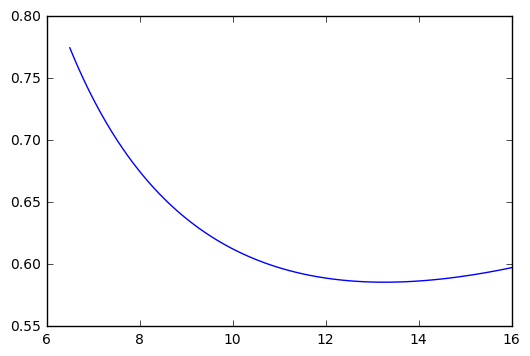

In [91]:
x = np.linspace(r,R,100)
plt.plot(x,phi(20)(x))

In [93]:
golden_search(phi(20,min_search=True),r,R)

Accuracy of 1e-05 reached after 29 iterations
Mode: -0.5856855434571515, located at 13.266498617053536


-0.58568554345715151

In [94]:
def delta_phi(d):
    '''The inner iteration finds the minimum and maximum of phi for a fixed d'''
    maxphi = golden_search(phi(d,min_search=False),r,R, tol = 1e-5, suppress = True)
    minphi = golden_search(phi(d,min_search=True),r,R, tol = 1e-5, suppress = True)
    #note minphi is negative
    return  - np.abs(maxphi + minphi)

## References

[1] Rolz, C., Mata-Alvarez, J., 1992.<a href='https://link.springer.com/content/pdf/10.1007%2FBF01198762.pdf'> Use of the Golden Section search method to estimate the parameters of the Monod model employing spread-sheets </a>  *World Journal of Microbiology and Biotechnology 8*, pp. 439-445

[2] Tsai, C., Kolibal, J., Li, M., 2010. <a href='http://www.sciencedirect.com/science/article/pii/S0955799710000652'> The Golden Section search algorithm for finding a good shape parameter for meshless collocation methods </a> *Engineering Analysis with Boundary Elements 34*(8), pp. 738-746

